### In this notebook we will perform the word embedding & topic modeling & Cosine Similarity

***we merged the **three** chapters to perform the topic modeling, in order to perform cosine similarity to select which chapter the new input should go with.***

In [2]:
import pandas as pd
import numpy as np
import pickle
import re
from nltk.stem import WordNetLemmatizer
# gensim
from gensim import corpora, models, similarities, matutils

# sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

### Read the data and pickle file

In [4]:
df02 = pd.read_csv('renal-disease-symptoms.csv')

In [5]:
# reading the stop words list with pickle
with open ('stop_words.ob', 'rb') as fp:
    stop_words = pickle.load(fp)

In [6]:
df02.columns

Index(['Disease', 'Signs and Symptoms'], dtype='object')

In [7]:
df02

,Disease,Signs and Symptoms
0,MEDULLARY SPONGE KIDNEY,Symptoms usually appear only as a result of co...
1,POLYCYSTIC KIDNEY DISEASE,PEDIATRIC TIP The neonate with infantile polyc...
2,ACUTE KIDNEY INJURY,AKI is a critical illness. Its early signs are...
3,ACUTE PYELONEPHRITIS,"Typical clinical features include urgency, fre..."
4,ACUTE POSTSTREPTOCOCCAL GLOMERULONEPHRITIS,APSGN begins within 1 to 3 weeks after pharyng...
5,ACUTE TUBULAR NECROSIS,Nephrotoxic injury causes multiple symptoms si...
6,RENAL INFARCTION,"Although renal infarction may be asymptomatic,..."
7,RENAL CALCULI,"Clinical effects vary with size, location, and..."
8,RENAL VEIN THROMBOSIS,Clinical features of renal vein thrombosis var...
9,NEPHROTIC SYNDROME,The dominant clinical feature of nephrotic syn...


### Word Embedding

In [9]:
df02['Signs and Symptoms']

0     Symptoms usually appear only as a result of co...
1     PEDIATRIC TIP The neonate with infantile polyc...
2     AKI is a critical illness. Its early signs are...
3     Typical clinical features include urgency, fre...
4     APSGN begins within 1 to 3 weeks after pharyng...
5     Nephrotoxic injury causes multiple symptoms si...
6     Although renal infarction may be asymptomatic,...
7     Clinical effects vary with size, location, and...
8     Clinical features of renal vein thrombosis var...
9     The dominant clinical feature of nephrotic syn...
10    Chronic glomerulonephritis typically develops ...
11    In addition to elevated systemic blood pressur...
12    Clinical features of hydronephrosis vary with ...
13    PEDIATRIC TIP In infants, RTA produces anorexi...
14    Chronic renal failure produces major changes i...
15    Lower UTI usually produces urgency, frequency,...
16    Vesicoureteral reflux typically manifests itse...
17    Neurogenic bladder produces a wide range o

In [10]:
def clean_text_func(text):
    # Instantiate the WordNetLemmatizer
    wordnet_lemmatizer = WordNetLemmatizer()

    
    text = str(text)
    text = text.lower()
    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!?.\/'+]", " ", text)
    text = re.sub(r"\+", " ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ", text)
    text = re.sub(r"\?", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"[0-9]", " ", text)
    final_text = ""
    for x in text.split():
        if x not in stop_words:
            lemmatized = wordnet_lemmatizer.lemmatize(x)
            final_text = final_text + x  +" "        
    return final_text

df02['Signs and Symptoms'] = df02['Signs and Symptoms'].apply(lambda x: clean_text_func(x))
df02

,Disease,Signs and Symptoms
0,MEDULLARY SPONGE KIDNEY,symptoms appear complications seldom adulthood...
1,POLYCYSTIC KIDNEY DISEASE,tip epicanthal folds pointed nose chin floppy ...
2,ACUTE KIDNEY INJURY,aki illness signs oliguria azotemia rarely anu...
3,ACUTE PYELONEPHRITIS,features urgency frequency urination dysuria n...
4,ACUTE POSTSTREPTOCOCCAL GLOMERULONEPHRITIS,apsgn begins weeks pharyngitis symptoms oligur...
5,ACUTE TUBULAR NECROSIS,causes symptoms particularly azotemia anemia a...
6,RENAL INFARCTION,infarction symptoms gnawing tenderness tendern...
7,RENAL CALCULI,effects vary size location etiology calculi re...
8,RENAL VEIN THROMBOSIS,features thrombosis vary speed onset onset obs...
9,NEPHROTIC SYNDROME,ankles sacrum children ascites genitalia sympt...


In [11]:
# Create a CountVectorizer for parsing/counting words
count_vectorizer = CountVectorizer(stop_words=stop_words)

doc_word_cv = count_vectorizer.fit_transform(df02['Signs and Symptoms'])

C:\Users\rinku\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['60', '72', 'avm', 'beta', 'com', 'contents', 'dq2', 'end', 'https', 'jsp', 'leg', 'mallory', 'salt', 'segment', 'self', 'sn', 'sodium', 'syndrome7', 'tavr_ucm_450827_article', 'uptodate', 'weiss', 'wv9focgvziu', 'www'] not in stop_words.
  warnings.warn(


In [12]:
pd.DataFrame(doc_word_cv.toarray(), index=df02['Disease'], columns = count_vectorizer.get_feature_names_out()).head()

,abdomen,abnormalities,abrade,accelerate,accelerated,accompanies,accompany,accumulation,acidosis,activates,...,warmth,wasting,water,weakness,weeks,widening,worsened,worsens,wound,years
Disease,,,,,,,,,,,,,,,,,,,,,
MEDULLARY SPONGE KIDNEY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
POLYCYSTIC KIDNEY DISEASE,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
ACUTE KIDNEY INJURY,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
ACUTE PYELONEPHRITIS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACUTE POSTSTREPTOCOCCAL GLOMERULONEPHRITIS,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [13]:
# Create a TfidfVectorizer for parsing/counting words
tfidf = TfidfVectorizer(stop_words=stop_words)

doc_word_tfidf = tfidf.fit_transform(df02['Signs and Symptoms'])

C:\Users\rinku\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['60', '72', 'avm', 'beta', 'com', 'contents', 'dq2', 'end', 'https', 'jsp', 'leg', 'mallory', 'salt', 'segment', 'self', 'sn', 'sodium', 'syndrome7', 'tavr_ucm_450827_article', 'uptodate', 'weiss', 'wv9focgvziu', 'www'] not in stop_words.
  warnings.warn(


In [14]:
pd.DataFrame(doc_word_tfidf.toarray(), index=df02['Disease'], columns = tfidf.get_feature_names_out()).head()

,abdomen,abnormalities,abrade,accelerate,accelerated,accompanies,accompany,accumulation,acidosis,activates,...,warmth,wasting,water,weakness,weeks,widening,worsened,worsens,wound,years
Disease,,,,,,,,,,,,,,,,,,,,,
MEDULLARY SPONGE KIDNEY,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
POLYCYSTIC KIDNEY DISEASE,0.113993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.129438,...,0.0,0.0,0.000000,0.0,0.000000,0.129438,0.129438,0.0,0.0,0.113993
ACUTE KIDNEY INJURY,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.139057,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
ACUTE PYELONEPHRITIS,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
ACUTE POSTSTREPTOCOCCAL GLOMERULONEPHRITIS,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.210653,0.0,0.210653,0.000000,0.000000,0.0,0.0,0.000000


### Topic Modeling: **LDA**

In [16]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(doc_word_cv)
corpus

In [17]:
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())
id2word

{438: 'symptoms',
 26: 'appear',
 77: 'complications',
 396: 'seldom',
 11: 'adulthood',
 53: 'calcium',
 427: 'stones',
 267: 'lodge',
 72: 'collecting',
 127: 'ducts',
 325: 'pass',
 115: 'dilation',
 327: 'patients',
 70: 'colic',
 205: 'hematuria',
 454: 'tract',
 471: 'uti',
 469: 'urination',
 468: 'urgency',
 179: 'frequency',
 359: 'pyelonephritis',
 224: 'impairment',
 303: 'obstruction',
 451: 'tip',
 144: 'epicanthal',
 173: 'folds',
 336: 'pointed',
 301: 'nose',
 66: 'chin',
 171: 'floppy',
 269: 'lowset',
 131: 'ears',
 341: 'potter',
 159: 'facies',
 42: 'birth',
 278: 'masses',
 170: 'flanks',
 456: 'transilluminated',
 63: 'characteristically',
 401: 'shows',
 402: 'signs',
 123: 'distress',
 150: 'eventually',
 467: 'uremia',
 44: 'bleeding',
 473: 'varices',
 377: 'requiring',
 393: 'sclerotherapy',
 338: 'portacaval',
 250: 'kidney',
 232: 'induce',
 337: 'polyuria',
 472: 'utis',
 486: 'widening',
 0: 'abdomen',
 487: 'worsened',
 153: 'exertion',
 373: 'relieved',

In [18]:
# Create lda model (equivalent to "fit" in sklearn)
lda = models.LdaModel(corpus=corpus, num_topics=len(df02), id2word=id2word, passes=20)

In [19]:
lda.print_topics(31)

[(0,
  '0.271*"abdomen" + 0.193*"aldosterone" + 0.114*"alternating" + 0.087*"accelerate" + 0.001*"aki" + 0.001*"alcohol" + 0.001*"acidosis" + 0.001*"abnormalities" + 0.001*"accelerated" + 0.001*"accompanies"'),
 (1,
  '0.653*"amenorrhea" + 0.073*"aldosterone" + 0.044*"angle" + 0.001*"alcohol" + 0.001*"acidosis" + 0.000*"anemia" + 0.000*"adults" + 0.000*"alternating" + 0.000*"abdomen" + 0.000*"accumulation"'),
 (2,
  '0.502*"anemia" + 0.071*"accelerate" + 0.063*"aldosterone" + 0.004*"abdomen" + 0.004*"alternating" + 0.002*"adults" + 0.002*"angle" + 0.001*"amenorrhea" + 0.001*"abnormalities" + 0.001*"alcohol"'),
 (3,
  '0.242*"accelerate" + 0.152*"accompany" + 0.073*"alternating" + 0.058*"aldosterone" + 0.057*"accelerated" + 0.053*"abnormalities" + 0.052*"adults" + 0.037*"addition" + 0.025*"aki" + 0.025*"accompanies"'),
 (4,
  '0.002*"accumulation" + 0.002*"abdomen" + 0.002*"abrade" + 0.002*"alternating" + 0.002*"aldosterone" + 0.002*"accelerate" + 0.002*"accompanies" + 0.002*"accompany"

### Performing CorEx:

In [21]:
from corextopic import corextopic as ct
from corextopic import vis_topic as vt

words = list(np.asarray(tfidf.get_feature_names_out()))


In [22]:
topic_model = ct.Corex(n_hidden=len(df02), words=words, seed=1)
topic_model.fit(doc_word_tfidf, words=words, docs=df02['Signs and Symptoms'])

In [23]:
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: acidosis,confusion,atn,coma,purpura,overload,irritability,muscle,critically,pericarditis
1: apsgn,addition,anxiety,tolerance,stroke,states,sluggishness,extremes,headedness,palpitations
2: rta,accelerate,glomerulonephritis,nephrocalcinosis,accelerated,ankles,ascites,thromboembolic,atherosclerosis,malnutrition
3: scrotum,groin,walking,attempt,swelling,erythema,hydrocele,waddle,protect,urination
4: onset,kidneys,leukocytosis,speed,hypoalbuminemia,hyperlipidemia,thrombosis,enlarge,epigastric,proteinuria
5: changes,starting,span,signs,palpation,orifices,menses,membranes,mechanisms,males
6: atrophy,bradycardia,brain,chin,completely,hematuria,macrophage,potassium,rather,sclerotherapy
7: alcohol,trigger,temperature,stone,smelling,renin,rapidly,range,phosphorus,pallor
8: abdomen,tip,size,potter,parotitis,nocturia,midline,lines,incontinence,transilluminated
9: abrade,smell,pruritus,micturition,lowset,ileus,hydronephrosis,hair,gnawing,tactile
10: calcification,starts,spasms,rise,patterns,nose,

### Topic Modeling: LSA

In [25]:
lsa = TruncatedSVD(len(df02))
doc_topic = lsa.fit_transform(doc_word_tfidf)
print(lsa.explained_variance_ratio_)

optimal_components = np.argmax(np.cumsum(lsa.explained_variance_ratio_) >= 0.90) + 1
print("Optimal number of components:", optimal_components)

[0.01561359 0.07398093 0.06556439 0.0631631  0.05850968 0.05706118
 0.05461785 0.0540948  0.05288258 0.05173596 0.05107454 0.04771442
 0.04652975 0.04477034 0.04304507 0.04305963 0.04221647 0.04049591
 0.03643933 0.03202404 0.02540647]
Optimal number of components: 18


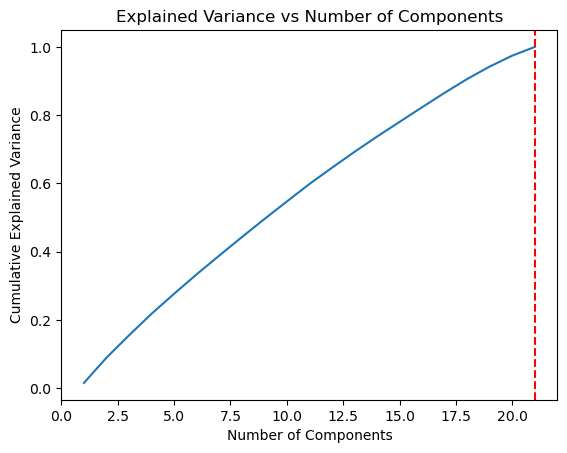

In [26]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

explained_variance = np.cumsum(lsa.explained_variance_ratio_)
plt.plot(range(1, len(explained_variance) + 1), explained_variance)
plt.axvline(x=len(df02), color='r', linestyle='--')  # Mark 21 components
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.show()

In [27]:
topic_word = pd.DataFrame(lsa.components_.round(len(df02)),
             index = ['component'+str(i) for i in range(len(df02))],
             columns = count_vectorizer.get_feature_names_out())

print(topic_word)

              abdomen  abnormalities    abrade  accelerate  accelerated  \
component0   0.024083       0.032254  0.010033    0.037003     0.020758   
component1   0.016285      -0.009833 -0.005138   -0.063841    -0.020002   
component2   0.011793       0.022896  0.030505   -0.006529    -0.011968   
component3   0.030551       0.039015  0.027002    0.054206    -0.048678   
component4   0.016015      -0.011387 -0.015412    0.030885     0.032971   
component5  -0.000297       0.012123  0.030351   -0.114043     0.067335   
component6   0.063417       0.013964  0.008276   -0.054203    -0.034740   
component7   0.034043       0.006566  0.018573    0.079956    -0.004402   
component8  -0.036642       0.074041 -0.018955   -0.108389    -0.110996   
component9  -0.013348       0.012946 -0.009716   -0.035488     0.158360   
component10  0.006183      -0.008895 -0.016448    0.193898    -0.094853   
component11 -0.015218      -0.008315 -0.011833    0.219389     0.058046   
component12 -0.030944    

In [28]:
tem_list = [] 
def display_topics(model, feature_names, no_top_words, topic_names=None):
    
    for ix, topic in enumerate(model.components_):
        inner_tem_list = []
       
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
            
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        inner_tem_list.append(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        tem_list.append(inner_tem_list)

In [29]:
result1 = display_topics(lsa, count_vectorizer.get_feature_names_out(), 25)
# tem_list


Topic  0
symptoms, bladder, signs, obstruction, uti, hematuria, tip, chills, urination, children, vomiting, patients, features, urgency, frequency, complications, pyelonephritis, dysuria, produces, anemia, nausea, tenderness, nocturia, causes, lethargy

Topic  1
bladder, feeling, possibly, uti, spasms, urination, incontinence, nocturia, discharge, fullness, cramps, warmth, arms, cord, tone, depending, dysuria, status, prostate, voiding, micturition, palpation, extent, urgency, stream

Topic  2
calculi, kidney, infarction, obstruction, tenderness, vary, groin, hydronephrosis, angiotensin, onset, results, hematuria, days, scrotum, symptoms, uremia, proteinuria, stimulates, gnawing, mechanism, pyuria, renin, types, size, pyelonephritis

Topic  3
calculi, obstruction, bladder, onset, oliguria, hydronephrosis, insufficiency, kidney, vary, proteinuria, anuria, kidneys, bph, stream, follow, causes, possibly, generally, incontinence, dribbling, hesitancy, nausea, anemia, become, region

Topic

In [30]:
from sklearn.metrics.pairwise import cosine_similarity
tem_list

topic_descriptions = [" ".join(topic) for topic in tem_list]

# Convert topic descriptions into a vectorized form
topic_vector = tfidf.transform(topic_descriptions)

# Get cosine similarity between topics and disease descriptions
topic_similarities = cosine_similarity(topic_vector, doc_word_tfidf)

topic_disease_assignment = {}
assigned_diseases = set()
for i, similarities in enumerate(topic_similarities):
    sorted_indices = np.argsort(similarities)[::-1]
    
    for idx in sorted_indices:
        disease = df02['Disease'].iloc[idx]
        
        # Ensure the disease hasn't already been assigned
        if disease not in assigned_diseases:
            topic_disease_assignment[f"Topic {i+1}"] = disease
            assigned_diseases.add(disease)
            break

# Print topic to disease assignment
print("\nTopic to Disease Assignment:")
for topic, disease in topic_disease_assignment.items():
    print(f"{topic} -> {disease}")
# final_dic = {}
# # final_dic["Cardio"] = tem_list[0]
# # final_dic["Neuro"] = tem_list[1]
# # final_dic["Renal"] = tem_list[2]

# for i in range(len(df02)):
#     # Assign the corresponding value from tem_list to the disease name
#     if i < len(tem_list):
#         final_dic[df02['Disease'][i]] = tem_list[i]
#     else:
#         final_dic[df02['disease_name'][i]] = None


Topic to Disease Assignment:
Topic 1 -> LOWER URINARY TRACT INFECTION
Topic 2 -> NEUROGENIC BLADDER
Topic 3 -> RENAL INFARCTION
Topic 4 -> RENAL VEIN THROMBOSIS
Topic 5 -> RENOVASCULAR HYPERTENSION
Topic 6 -> MEDULLARY SPONGE KIDNEY
Topic 7 -> RENAL TUBULAR ACIDOSIS
Topic 8 -> EPIDIDYMITIS
Topic 9 -> HYDRONEPHROSIS
Topic 10 -> NEPHROTIC SYNDROME
Topic 11 -> CHRONIC GLOMERULONEPHRITIS
Topic 12 -> PROSTATITIS
Topic 13 -> VESICOURETERAL REFLUX
Topic 14 -> ACUTE TUBULAR NECROSIS
Topic 15 -> ACUTE PYELONEPHRITIS
Topic 16 -> ACUTE POSTSTREPTOCOCCAL GLOMERULONEPHRITIS
Topic 17 -> RENAL CALCULI
Topic 18 -> POLYCYSTIC KIDNEY DISEASE
Topic 19 -> CHRONIC RENAL FAILURE
Topic 20 -> ACUTE KIDNEY INJURY
Topic 21 -> BENIGN PROSTATIC HYPERPLASIA


In [31]:
data = []

# Loop through the topics and their corresponding diseases and top words
for topic, disease in topic_disease_assignment.items():
    # Find the index of the disease
    disease_index = df02[df02['Disease'] == disease].index[0]
    
    # Get the top words for the current topic
    top_words_for_topic = tem_list[int(topic.split()[1]) - 1]

    top_words_str = ', '.join(top_words_for_topic)
    
    # Append the data to the list
    data.append([topic, disease, top_words_str])

df_assignment = pd.DataFrame(data, columns=["Topic", "Disease", "Description"])
df_assignment

,Topic,Disease,Description
0,Topic 1,LOWER URINARY TRACT INFECTION,"symptoms, bladder, signs, obstruction, uti, he..."
1,Topic 2,NEUROGENIC BLADDER,"bladder, feeling, possibly, uti, spasms, urina..."
2,Topic 3,RENAL INFARCTION,"calculi, kidney, infarction, obstruction, tend..."
3,Topic 4,RENAL VEIN THROMBOSIS,"calculi, obstruction, bladder, onset, oliguria..."
4,Topic 5,RENOVASCULAR HYPERTENSION,"infarction, tenderness, bladder, occlusion, an..."
5,Topic 6,MEDULLARY SPONGE KIDNEY,"complications, calculi, ducts, obstruction, co..."
6,Topic 7,RENAL TUBULAR ACIDOSIS,"rta, growth, nephrocalcinosis, rickets, kidney..."
7,Topic 8,EPIDIDYMITIS,"scrotum, groin, calculi, malaise, swelling, at..."
8,Topic 9,HYDRONEPHROSIS,"groin, scrotum, rta, hydronephrosis, growth, n..."
9,Topic 10,NEPHROTIC SYNDROME,"rta, onset, accelerated, malnutrition, ascites..."


In [32]:
tem_df = df_assignment.drop('Topic',axis=1)
tem_df

,Disease,Description
0,LOWER URINARY TRACT INFECTION,"symptoms, bladder, signs, obstruction, uti, he..."
1,NEUROGENIC BLADDER,"bladder, feeling, possibly, uti, spasms, urina..."
2,RENAL INFARCTION,"calculi, kidney, infarction, obstruction, tend..."
3,RENAL VEIN THROMBOSIS,"calculi, obstruction, bladder, onset, oliguria..."
4,RENOVASCULAR HYPERTENSION,"infarction, tenderness, bladder, occlusion, an..."
5,MEDULLARY SPONGE KIDNEY,"complications, calculi, ducts, obstruction, co..."
6,RENAL TUBULAR ACIDOSIS,"rta, growth, nephrocalcinosis, rickets, kidney..."
7,EPIDIDYMITIS,"scrotum, groin, calculi, malaise, swelling, at..."
8,HYDRONEPHROSIS,"groin, scrotum, rta, hydronephrosis, growth, n..."
9,NEPHROTIC SYNDROME,"rta, onset, accelerated, malnutrition, ascites..."


In [33]:
tem_df.columns

Index(['Disease', 'Description'], dtype='object')

In [34]:
tem_df.to_csv('renal_modelled.csv', index=False)